In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import random, os, csv
import pandas as pd
import cv2 as cv
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

TensorFlow 2.x selected.


In [0]:
def download_if_missing(url, target, extract=True):
  if os.path.exists(target):
    return target
  return tf.keras.utils.get_file(target, origin=url, extract=extract)

In [0]:
colab_root = "/content/" 

In [0]:
csv_path = os.path.join(colab_root, "starter.csv")
download_if_missing("https://storage.googleapis.com/applied-dl/mini-vqa/starter.csv",
                     csv_path)

9084928/9078552 [==============================] - 0s 0us/step


'/content/starter.csv'

In [0]:
YOUR_THUMBNAILS_URL = 'https://storage.cloud.google.com/vira-behnam/thumbnails.zip'
thumbnails_file = os.path.join(colab_root, "thumbnails.zip")
images_folder = os.path.join(colab_root, 'thumbnails/')
download_if_missing(YOUR_THUMBNAILS_URL,
                    thumbnails_file,
                    extract=False)

  73728/Unknown - 0s 0us/step

'/content/thumbnails.zip'

In [0]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# !unzip -q $thumbnails_file -d $images_folder
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/thumbnails.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/thumbnails/')

In [0]:
!ls $images_folder

COCO_train2014_000000000025.jpg  COCO_train2014_000000299443.jpg
COCO_train2014_000000000030.jpg  COCO_train2014_000000299474.jpg
COCO_train2014_000000000049.jpg  COCO_train2014_000000299489.jpg
COCO_train2014_000000000064.jpg  COCO_train2014_000000299495.jpg
COCO_train2014_000000000071.jpg  COCO_train2014_000000299498.jpg
COCO_train2014_000000000077.jpg  COCO_train2014_000000299560.jpg
COCO_train2014_000000000078.jpg  COCO_train2014_000000299568.jpg
COCO_train2014_000000000081.jpg  COCO_train2014_000000299618.jpg
COCO_train2014_000000000089.jpg  COCO_train2014_000000299623.jpg
COCO_train2014_000000000109.jpg  COCO_train2014_000000299630.jpg
COCO_train2014_000000000113.jpg  COCO_train2014_000000299641.jpg
COCO_train2014_000000000149.jpg  COCO_train2014_000000299657.jpg
COCO_train2014_000000000151.jpg  COCO_train2014_000000299662.jpg
COCO_train2014_000000000154.jpg  COCO_train2014_000000299672.jpg
COCO_train2014_000000000165.jpg  COCO_train2014_000000299675.jpg
COCO_train2014_0000000002

In [0]:
df = pd.read_csv("starter.csv", header=None)

In [0]:
# for question, answer, image_name in data:
#   img_path = os.path.join(images_folder, image_name)
#   assert os.path.exists(img_path)

with open('starter.csv') as myfile:
   reader = csv.reader(myfile, delimiter=',')
   for row in reader:
      question, answer, image = row
      image = image.strip()
      assert os.path.exists(os.path.join("thumbnails/", image))

COCO_train2014_000000386809.jpg
Q: are these passenger trains A: yes


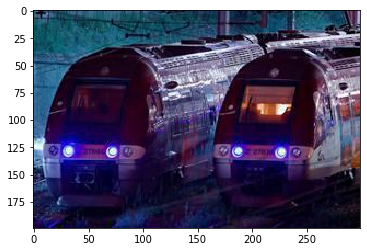

In [0]:
path = r"thumbnails/"
random_filename = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
print(random_filename)

img = cv.imread("thumbnails/" + random_filename)
plt.imshow(img)

for index, row in df.iterrows():
  # print(row[2])
  if (row[2] == str(random_filename)):
    print("Q: " + row[0] + " A: " + row[1])
    break

In [0]:
df

,0,1,2
0,is the sky blue,yes,COCO_train2014_000000393221.jpg
1,is there snow on the mountains,yes,COCO_train2014_000000393221.jpg
2,is the window open,yes,COCO_train2014_000000393223.jpg
3,is she brushing,yes,COCO_train2014_000000393223.jpg
4,is the man smiling,no,COCO_train2014_000000393224.jpg
...,...,...,...
140632,is this in focus,no,COCO_train2014_000000393207.jpg
140633,can he be sharpening blades,yes,COCO_train2014_000000262136.jpg
140634,is this a normal thing to see in recent history,no,COCO_train2014_000000262136.jpg
140635,is there a computer mouse on the desk,no,COCO_train2014_000000524286.jpg


In [0]:
# Convert the answers column in the starter CSV to 1.0 and 0.0

df[1].replace('yes', np.float32(1.0), inplace=True)
df[1].replace('no', np.float32(0.0), inplace=True)

df[1] = tf.dtypes.cast(df[1], tf.float32)  # [1, 2], dtype=tf.int32

# Convert the image filenames in the starter CSV to absolute paths

df[2] = '/content/thumbnails/' + df[2]

In [0]:
df

,0,1,2
0,is the sky blue,1.0,/content/thumbnails/COCO_train2014_00000039322...
1,is there snow on the mountains,1.0,/content/thumbnails/COCO_train2014_00000039322...
2,is the window open,1.0,/content/thumbnails/COCO_train2014_00000039322...
3,is she brushing,1.0,/content/thumbnails/COCO_train2014_00000039322...
4,is the man smiling,0.0,/content/thumbnails/COCO_train2014_00000039322...
...,...,...,...
140632,is this in focus,0.0,/content/thumbnails/COCO_train2014_00000039320...
140633,can he be sharpening blades,1.0,/content/thumbnails/COCO_train2014_00000026213...
140634,is this a normal thing to see in recent history,0.0,/content/thumbnails/COCO_train2014_00000026213...
140635,is there a computer mouse on the desk,0.0,/content/thumbnails/COCO_train2014_00000052428...


In [0]:
# Shuffle the starter CSV
# Remove 4,000 rows (or so) and move them to a separate file or data structure
df = df.sample(frac=1).reset_index(drop=True)

In [0]:
test_df = pd.DataFrame(df)[-4000:].copy(deep=True).reset_index(drop=True)

In [0]:
train_df = df[:-4000]

In [0]:
df[1].dtype

dtype('float32')

In [0]:
# Limit the size of the starter CSV to 20,000 rows
# Balance the data (so you have an equal number of "yes" and "no" answers) 
# in your 20,000 rows

# from https://stackoverflow.com/questions/45839316/pandas-balancing-data
def sampling_k_elements(group, k=10000):
    if len(group) < k:
        return group
    return group.sample(k)

mini_train_df = df.groupby(row[1]).apply(sampling_k_elements).reset_index(drop=True)

In [0]:
X_train, X_valid = train_test_split(mini_train_df, test_size=0.2)

In [0]:
X_train[1].dtype

dtype('float32')

In [0]:
X_train.size

48000

In [0]:
X_valid.size

12000

1. Example of training set image:  /content/thumbnails/COCO_train2014_000000153829.jpg
2. Example of validation set image:  /content/thumbnails/COCO_train2014_000000422769.jpg


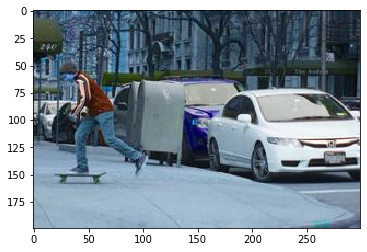

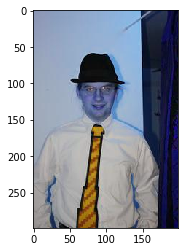

In [0]:
#display images from each set

filename = os.path.join(path, X_train[2][6]) #randomly selected images
filename_val = os.path.join(path, X_valid[2][97])

print("1. Example of training set image: ", filename)
img = cv.imread(str(filename))
plt.imshow(img)
plt.figure()
print("2. Example of validation set image: ", filename_val)
img2 = cv.imread(str(filename_val))
plt.imshow(img2);

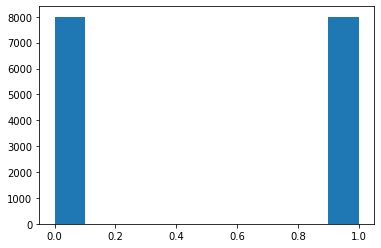

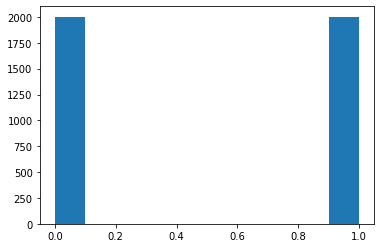

In [0]:
import numpy as np
import matplotlib.pyplot as plt

bins = 10
data_train = X_train[1]
data_val = X_valid[1]

#confirming only yes/ no (1.0/ 0.0) answers and that the classes are balanced
# for training and validation sets.
plt.hist(data_train, bins, histtype='bar', stacked=False, fill=True)
plt.show()
plt.hist(data_val, bins, histtype='bar', stacked=False, fill=True)
plt.show()

In [0]:
# Create a feature extraction model.
image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output
image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

87916544/87910968 [==============================] - 6s 0us/step


In [0]:
# A method to load an image off disk, and extract activations using 
# the model above. You should not need to modify this.
def image_to_activations(image_path):
  img = tf.io.read_file(image_path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, (299, 299))
  activations = tf.keras.applications.inception_v3.preprocess_input(img)
  return activations, image_path

In [0]:
# Extract activations for every image in your train, validation,
# and test set -> set of the absolute paths to all of these images 
# (image_path_set). Populate with the absolute paths to all these images.
trainset = set(X_train[2])
testset = set(test_df[2])
validset = set(X_valid[2])

image_path_set = trainset.union(testset,validset)

print("Images to preprocess", len(image_path_set))
print("This make take a few minutes")

Images to preprocess 17859
This make take a few minutes


In [0]:
trainset

{'/content/thumbnails/COCO_train2014_000000367100.jpg',
 '/content/thumbnails/COCO_train2014_000000422969.jpg',
 '/content/thumbnails/COCO_train2014_000000055821.jpg',
 '/content/thumbnails/COCO_train2014_000000475019.jpg',
 '/content/thumbnails/COCO_train2014_000000018647.jpg',
 '/content/thumbnails/COCO_train2014_000000015757.jpg',
 '/content/thumbnails/COCO_train2014_000000351566.jpg',
 '/content/thumbnails/COCO_train2014_000000177011.jpg',
 '/content/thumbnails/COCO_train2014_000000239811.jpg',
 '/content/thumbnails/COCO_train2014_000000214827.jpg',
 '/content/thumbnails/COCO_train2014_000000044227.jpg',
 '/content/thumbnails/COCO_train2014_000000565365.jpg',
 '/content/thumbnails/COCO_train2014_000000561794.jpg',
 '/content/thumbnails/COCO_train2014_000000173887.jpg',
 '/content/thumbnails/COCO_train2014_000000341539.jpg',
 '/content/thumbnails/COCO_train2014_000000423606.jpg',
 '/content/thumbnails/COCO_train2014_000000011299.jpg',
 '/content/thumbnails/COCO_train2014_00000022983

In [0]:
# This cell will extract activations for each image and save them to disk 
# in NumPy format.

# Create a dataset to load each image off disk, and extract activations
activation_dataset = tf.data.Dataset.from_tensor_slices(list(image_path_set))
activation_dataset = activation_dataset.map(
  image_to_activations, 
  num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(32)

# Save all activations to disk in NumPy format
for img_batch, path_batch in activation_dataset:
  batch_features = image_features_extract_model(img_batch)
  for bf, p in zip(batch_features, path_batch):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())

In [0]:
# Populate these for your training set.
questions_train = X_train[0] # a list of absolute paths to images in your training set
answers_train = X_train[1] # a list of questions in your training set
images_train = X_train[2] # a list of answers (in numeric format) in your training set

# The order of these lists should match (e.g. the question, answer, and image 
# from row i of your train split of the starter CSV should be 
# questions_train[i], answers_train[i], images_train[i]).

In [0]:
print(X_train[1].dtype)

float32


In [0]:
# Populate these for your validation set.
questions_val = X_valid[0]
answers_val = X_valid[1]
images_val =  X_valid[2]

In [0]:
print(X_valid[0].dtype, X_valid[1].dtype, X_valid[2].dtype)
print(X_train[0].dtype, X_train[1].dtype, X_train[2].dtype)

object float32 object
object float32 object


In [0]:
# Populate these for your test set
questions_test = test_df[0]
answers_test = test_df[1]
images_test = test_df[2]

In [0]:
VOCAB_SIZE = 3000

In [0]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(questions_train)

# Note, the tokenizer's word_index will not respect VOCAB_SIZE.
# but, that parameter will be respected in later methods,
# (for example, when you call text_to_sequences).
# Also note that '0' is a reserved index for padding.
print("Word index", len(tokenizer.word_index))

Word index 4732


In [0]:
# Use the texts_to_sequences utility to vectorize your training, 
# validation, and test questions. 

sequences_train = tokenizer.texts_to_sequences(questions_train)
sequences_val = tokenizer.texts_to_sequences(questions_val)
sequences_test = tokenizer.texts_to_sequences(questions_test)

In [0]:
# To choose a reasonable sequence length, examine the length of all the 
# tokenized questions in the training set (in words).


count10 = 0
count15 = 0
count17 = 0

for i, row in enumerate(sequences_train, start = 0):
  if len(sequences_train[i]) > 10:
    count10 = count10 + 1
    if len(sequences_train[i]) > 15:
      count15 = count15 + 1
      if len(sequences_train[i]) > 16:
        count17 = count17 + 1

print("Over 10: " + str(count10))
print("Over 15: " + str(count15))
print("Over 17: " + str(count17))

# therefore, we limit the length to 17, which has 8.

Over 10: 375
Over 15: 19
Over 17: 8


In [0]:
len(sequences_train)

16000

In [0]:
MAX_SEQ_LEN = 17

In [0]:
# Use the pad_sequences utility to pad your training, 
# validation, and test questions.

padded_train = tf.keras.preprocessing.sequence.pad_sequences(sequences_train, maxlen=MAX_SEQ_LEN)
padded_val = tf.keras.preprocessing.sequence.pad_sequences(sequences_val, maxlen=MAX_SEQ_LEN)
padded_test = tf.keras.preprocessing.sequence.pad_sequences(sequences_test, maxlen=MAX_SEQ_LEN)

In [0]:
padded_train
word_index = tokenizer.word_index
word_index

{'is': 1,
 'the': 2,
 'a': 3,
 'this': 4,
 'are': 5,
 'in': 6,
 'there': 7,
 'on': 8,
 'does': 9,
 'of': 10,
 'it': 11,
 'man': 12,
 'to': 13,
 'these': 14,
 'have': 15,
 'wearing': 16,
 'picture': 17,
 'any': 18,
 'people': 19,
 'do': 20,
 'person': 21,
 'you': 22,
 'an': 23,
 'photo': 24,
 'be': 25,
 'they': 26,
 'look': 27,
 'can': 28,
 'he': 29,
 'water': 30,
 'that': 31,
 'for': 32,
 'room': 33,
 'woman': 34,
 'all': 35,
 'at': 36,
 'dog': 37,
 'see': 38,
 'train': 39,
 'cat': 40,
 'same': 41,
 'food': 42,
 'animals': 43,
 'has': 44,
 'bus': 45,
 'plane': 46,
 'color': 47,
 'animal': 48,
 'one': 49,
 'pizza': 50,
 'and': 51,
 'could': 52,
 'like': 53,
 'taken': 54,
 'happy': 55,
 'day': 56,
 'white': 57,
 'his': 58,
 'would': 59,
 'sky': 60,
 'with': 61,
 'been': 62,
 'toilet': 63,
 'than': 64,
 'both': 65,
 'she': 66,
 'bathroom': 67,
 'was': 68,
 'sunny': 69,
 'someone': 70,
 'eating': 71,
 'going': 72,
 'anyone': 73,
 'image': 74,
 'did': 75,
 'up': 76,
 'open': 77,
 'street': 

In [0]:
BATCH_SIZE = 32
BUFFER_SIZE = 1000

In [0]:
# Load cached activations off disk.
def load_np(img_path, question, answer):
  activations = np.load(img_path.decode('utf-8')+'.npy')
  return activations, question, answer, img_path

In [0]:
# This method will create a dataset that returns four elements.
# - a batch of activations (loaded from disk)
# - a batch of padded questions
# - a batch of numeric answers
# - a batch of absolute paths to the corresponding images
def create_dataset(images, sequences, answers):
  dataset = tf.data.Dataset.from_tensor_slices((images, 
                                                sequences, 
                                                answers))
  # Load the cached activations off disk
  def my_lambda(x, y, z):
    return tf.numpy_function(
      load_np, [x, y, z], [tf.float32, tf.int32, tf.float32, tf.string]
    )
  dataset = dataset.map(my_lambda, num_parallel_calls=tf.data.experimental.AUTOTUNE)
  
  # Shuffle and batch
  dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
  dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
  return dataset

In [0]:
# Call the above method to create train, val, and test datasets.

train_ds = create_dataset(images_train, padded_train, answers_train)
val_ds = create_dataset(images_val, padded_val, answers_val)
test_ds = create_dataset(images_test, padded_test, answers_test)

In [0]:
print(images_train.dtype, padded_train.dtype, answers_train.dtype)

object int32 float32


In [0]:
my_iterator = iter(train_ds)
activations_batch, questions_batch, answers_batch, paths_batch = next(my_iterator)

# print(activations_batch.shape, 
#       questions_batch.shape, 
#       answers_batch.shape, 
#       paths_batch.shape)

print(activations_batch.dtype, 
      questions_batch.dtype, 
      answers_batch.dtype, 
      paths_batch.dtype)

<dtype: 'float32'> <dtype: 'int32'> <dtype: 'float32'> <dtype: 'string'>


In [0]:
answers_train.dtype

dtype('float32')

In [0]:
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input, LSTM
from tensorflow.keras.models import Model, Sequential

In [0]:
# See https://keras.io/getting-started/functional-api-guide/ for the idea.

# Input to your vision model (activations from Inception-V3,
# loaded off disk disk by the dataset above).
image_input = Input(shape=(8, 8, 2048)) 
vision_model = Sequential()
# Used to reduce the number of parameters (rather using a dense layer here).
vision_model.add(tf.keras.layers.GlobalAveragePooling2D())
# Output of your vision model
encoded_image = vision_model(image_input) 

# padded_train
question_input = Input(shape=(MAX_SEQ_LEN,), dtype='int32') # your code
embedded_question = Embedding(input_dim=3000, output_dim=256, input_length=MAX_SEQ_LEN)(question_input)
encoded_question = LSTM(256)(embedded_question)

# Concatenate the encoded image and question
merged = tf.keras.layers.concatenate([encoded_image, encoded_question])

# add a small dense layer -- tried this, but model did not perform well.
# dense = Dense(10, activation='softmax')(merged)

# Next, add a binary classifier on top
output = Dense(1, activation='sigmoid')(merged)

# Your final model
model = Model(inputs=[image_input, question_input], outputs=output)

In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 17)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 8, 8, 2048)] 0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 17, 256)      768000      input_3[0][0]                    
__________________________________________________________________________________________________
sequential (Sequential)         (None, 2048)         0           input_2[0][0]                    
____________________________________________________________________________________________

In [0]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

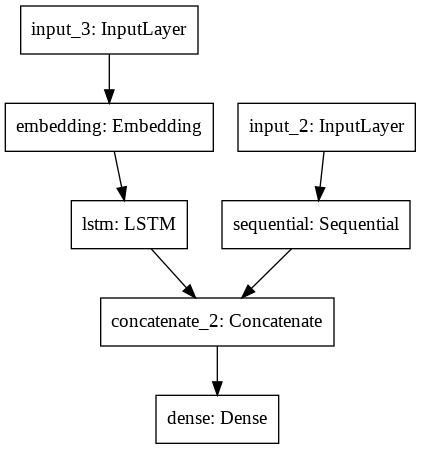

In [0]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
# Retrieve a batch of data from your train dataset
activations_batch, questions_batch, answers_batch, paths_batch = next(iter(train_ds))

In [0]:
# Train them model repeatedly using model.train_on_batch

metrics = model.train_on_batch([activations_batch, questions_batch], answers_batch)
# metrics is a list (loss is metrics[0], accuracy is metrics[1])

In [0]:
metrics[0] #loss keeps going down as you run previous block more times.

0.041555136

In [0]:
for prediction, answer in zip(model.predict(x=[activations_batch, questions_batch]), answers_batch):
  print(prediction, answer.numpy())

[0.72187763] 0.0
[0.48267674] 0.0
[0.608631] 0.0
[0.6115223] 0.0
[0.5154798] 0.0
[0.47793704] 0.0
[0.5962657] 0.0
[0.20939821] 0.0
[0.5340829] 1.0
[0.8074349] 0.0
[0.53507435] 1.0
[0.6399522] 0.0
[0.6428962] 1.0
[0.7171742] 0.0
[0.61530626] 1.0
[0.6144982] 0.0
[0.61819315] 0.0
[0.6524402] 0.0
[0.71774703] 1.0
[0.7499384] 0.0
[0.81899285] 1.0
[0.6295703] 1.0
[0.58839244] 0.0
[0.367425] 1.0
[0.55490917] 1.0
[0.5804329] 0.0
[0.6699577] 0.0
[0.5807566] 0.0
[0.4737157] 0.0
[0.47288975] 0.0
[0.48763415] 1.0
[0.76190203] 0.0


In [0]:
# Mount drive
drive.mount('/gdrive')
drive_root = '/gdrive/My Drive/'

Mounted at /gdrive


In [0]:
#  save checkpoints in drive
checkpoint_dir = os.path.join(drive_root, "checkpoints")
checkpoint_dir = os.path.join(checkpoint_dir, "hw4")

# Used for formatting
checkpoint_path = os.path.join(checkpoint_dir, "cp-{epoch:08d}.ckpt")

In [0]:
# Uncomment this if you'd like to create a checkpoints folder in your drive
print("Checkpoints directory is", checkpoint_dir)
if os.path.exists(checkpoint_dir):
  print("Checkpoints folder already exists")
else:
  print("Creating a checkpoints directory")
  os.makedirs(checkpoint_dir)

Checkpoints directory is /gdrive/My Drive/checkpoints/hw4
Checkpoints folder already exists


In [0]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
if latest != None:
  print("Loading weights from", latest)
  model.load_weights(latest)
else:
  print("Checkpoint not found. Starting from scratch")

Checkpoint not found. Starting from scratch


In [0]:
# Utilities to help record metrics.
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.Mean(name='train_accuracy')

val_loss = tf.keras.metrics.BinaryCrossentropy(name='val_loss')
val_accuracy = tf.keras.metrics.BinaryAccuracy(name='val_accuracy')

In [0]:
def evaluate(max_steps=None):
  steps = 0
  for activation_batch, question_batch, answer_batch, path_batch in val_ds:
    if max_steps != None and steps == max_steps:
      break
    predictions = model.predict(x=[activation_batch, question_batch])
    steps += 1 
    # Record metrics after each batch
    val_loss(answer_batch, predictions)
    val_accuracy(answer_batch, predictions)

In [0]:
# Complete this cell (there are only a few parts to write)
import time

# Used to track loss and accuracy as we go
# You should not need to modify these
train_loss_history, train_acc_history = [], []
val_loss_history, val_acc_history = [], []

epochs = 50 

# Training loop
for epoch in range(epochs):

  start = time.time()

  # Train for one epoch
  for activation_batch, question_batch, answer_batch, path_batch in train_ds:
    result = model.train_on_batch(x=[activation_batch, question_batch], y=answer_batch)

    # Record metrics after each batch
    train_loss(result[0])
    train_accuracy(result[1])

  # Evaluate for a few steps
  evaluate(max_steps=100)

  # Print progress
  # You should not need to modify this.
  template = 'Epoch {}, Loss: {:.2f}, Accuracy: {:.2f}, Val Loss {:.2f}, Val Accuracy {:.2f}, Time: {:.1f} secs'
  print(template.format(epoch,
                        train_loss.result(),
                        train_accuracy.result() * 100,
                        val_loss.result(),
                        val_accuracy.result() * 100,
                        time.time() - start))
  
  # Record history
  train_loss_history.append(train_loss.result())
  train_acc_history.append(train_accuracy.result() * 100)
  val_loss_history.append(val_loss.result())
  val_acc_history.append(val_accuracy.result() * 100)

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  val_loss.reset_states()
  val_accuracy.reset_states()

  # Save a checkpoint after each epoch
  print("Saving weights")
  model.save_weights('checkpoint_dir.h5')

Epoch 0, Loss: 0.51, Accuracy: 73.28, Val Loss 0.86, Val Accuracy 52.09, Time: 42.0 secs
Saving weights
Epoch 1, Loss: 0.47, Accuracy: 75.28, Val Loss 0.97, Val Accuracy 51.94, Time: 42.3 secs
Saving weights
Epoch 2, Loss: 0.44, Accuracy: 77.71, Val Loss 1.00, Val Accuracy 51.47, Time: 41.9 secs
Saving weights
Epoch 3, Loss: 0.42, Accuracy: 78.94, Val Loss 1.12, Val Accuracy 51.88, Time: 44.1 secs
Saving weights
Epoch 4, Loss: 0.40, Accuracy: 80.07, Val Loss 1.19, Val Accuracy 50.34, Time: 40.7 secs
Saving weights
Epoch 5, Loss: 0.38, Accuracy: 80.76, Val Loss 1.30, Val Accuracy 51.47, Time: 40.6 secs
Saving weights
Epoch 6, Loss: 0.37, Accuracy: 81.84, Val Loss 1.29, Val Accuracy 50.59, Time: 41.8 secs
Saving weights
Epoch 7, Loss: 0.35, Accuracy: 82.92, Val Loss 1.49, Val Accuracy 50.06, Time: 41.0 secs
Saving weights
Epoch 8, Loss: 0.33, Accuracy: 83.64, Val Loss 1.46, Val Accuracy 50.94, Time: 40.3 secs
Saving weights
Epoch 9, Loss: 0.32, Accuracy: 84.00, Val Loss 1.62, Val Accurac

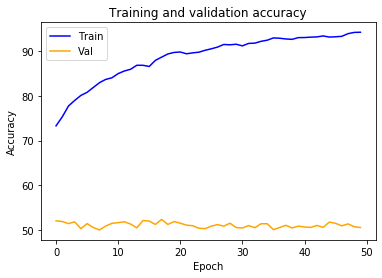

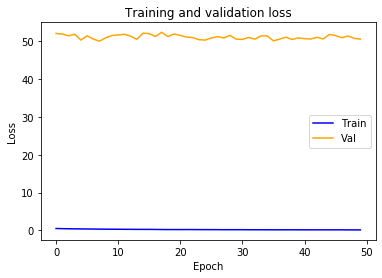

In [0]:
epochs = range(len(train_acc_history))

plt.title('Training and validation accuracy')
plt.plot(epochs, train_acc_history, color='blue', label='Train')
plt.plot(epochs, val_acc_history, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

_ = plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, train_loss_history, color='blue', label='Train')
plt.plot(epochs, val_acc_history, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

image_input = Input(shape=(8, 8, 2048)) 
vision_model = Sequential()
# Used to reduce the number of parameters (rather using a dense layer here).


vision_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vision_model.add(Conv2D(256, (3, 3), activation='relu'))
# vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(tf.keras.layers.GlobalAveragePooling2D())

# Output of your vision model
encoded_image = vision_model(image_input) 

# padded_train
question_input = Input(shape=(MAX_SEQ_LEN,), dtype='int32') # your code
embedded_question = Embedding(input_dim=3000, output_dim=256, input_length=MAX_SEQ_LEN)(question_input)
encoded_question = LSTM(256)(embedded_question)

# Concatenate the encoded image and question
merged = tf.keras.layers.concatenate([encoded_image, encoded_question])

# add a small dense layer -- tried this, but model did not perform well.
# dense = Dense(10, activation='softmax')(merged)

# Next, add a binary classifier on top
output = Dense(1, activation='sigmoid')(merged)

# Your final model
model2 = Model(inputs=[image_input, question_input], outputs=output)

model2.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
def evaluate(max_steps=None):
  steps = 0
  for activation_batch, question_batch, answer_batch, path_batch in val_ds:
    if max_steps != None and steps == max_steps:
      break
    predictions = model2.predict(x=[activation_batch, question_batch])
    steps += 1 
    # Record metrics after each batch
    val_loss(answer_batch, predictions)
    val_accuracy(answer_batch, predictions)

In [0]:
# Complete this cell (there are only a few parts to write)
import time

# Used to track loss and accuracy as we go
train_loss_history, train_acc_history = [], []
val_loss_history, val_acc_history = [], []

epochs = 50 

# Training loop
for epoch in range(epochs):

  start = time.time()

  # Train for one epoch
  for activation_batch, question_batch, answer_batch, path_batch in train_ds:
    result = model2.train_on_batch(x=[activation_batch, question_batch], y=answer_batch)

    # Record metrics after each batch
    train_loss(result[0])
    train_accuracy(result[1])

  # Evaluate for a few steps
  evaluate(max_steps=100)

  # Print progress
  template = 'Epoch {}, Loss: {:.2f}, Accuracy: {:.2f}, Val Loss {:.2f}, Val Accuracy {:.2f}, Time: {:.1f} secs'
  print(template.format(epoch,
                        train_loss.result(),
                        train_accuracy.result() * 100,
                        val_loss.result(),
                        val_accuracy.result() * 100,
                        time.time() - start))
  
  # Record history
  train_loss_history.append(train_loss.result())
  train_acc_history.append(train_accuracy.result() * 100)
  val_loss_history.append(val_loss.result())
  val_acc_history.append(val_accuracy.result() * 100)

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  val_loss.reset_states()
  val_accuracy.reset_states()

  # Save a checkpoint after each epoch
  print("Saving weights")
  model2.save_weights('checkpoint_dir_model2.h5')

Epoch 0, Loss: 0.72, Accuracy: 51.04, Val Loss 0.70, Val Accuracy 52.09, Time: 47.6 secs
Saving weights
Epoch 1, Loss: 0.66, Accuracy: 60.06, Val Loss 0.72, Val Accuracy 51.72, Time: 51.0 secs
Saving weights
Epoch 2, Loss: 0.61, Accuracy: 66.07, Val Loss 0.76, Val Accuracy 51.69, Time: 47.8 secs
Saving weights
Epoch 3, Loss: 0.57, Accuracy: 68.88, Val Loss 0.81, Val Accuracy 51.06, Time: 47.3 secs
Saving weights
Epoch 4, Loss: 0.53, Accuracy: 71.73, Val Loss 0.85, Val Accuracy 51.03, Time: 47.2 secs
Saving weights
Epoch 5, Loss: 0.49, Accuracy: 74.10, Val Loss 0.95, Val Accuracy 51.50, Time: 47.7 secs
Saving weights
Epoch 6, Loss: 0.46, Accuracy: 75.91, Val Loss 1.08, Val Accuracy 50.78, Time: 47.0 secs
Saving weights
Epoch 7, Loss: 0.43, Accuracy: 78.12, Val Loss 1.14, Val Accuracy 50.31, Time: 47.4 secs
Saving weights
Epoch 8, Loss: 0.40, Accuracy: 79.64, Val Loss 1.22, Val Accuracy 50.56, Time: 48.0 secs
Saving weights
Epoch 9, Loss: 0.38, Accuracy: 81.46, Val Loss 1.32, Val Accurac

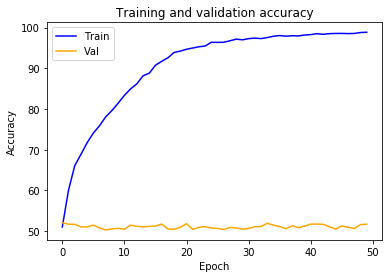

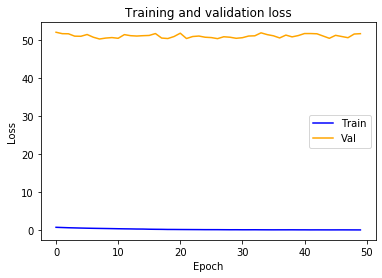

In [0]:
epochs = range(len(train_acc_history))

plt.title('Training and validation accuracy')
plt.plot(epochs, train_acc_history, color='blue', label='Train')
plt.plot(epochs, val_acc_history, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

_ = plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, train_loss_history, color='blue', label='Train')
plt.plot(epochs, val_acc_history, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [0]:
# As an experiment, 2 convolutional layers were added to the image model before
# being concatenated with the embedded questions for the training set. The
# Conv2D's should be able to better train the model with more parameters, 
# however, the model did about as well as the previous one. Everything else 
# was kept the same. Based on the the results above, it seems that the second 
# model performed better on the validation set. Therefore, we will continue 
# training with it, and use it for testing in the following block. 

In [0]:
# Calculate accuracy on the test set

test_loss = tf.keras.metrics.BinaryCrossentropy(name='test_loss')
test_accuracy = tf.keras.metrics.BinaryAccuracy(name='test_accuracy')

def evaluate_test(max_steps=None):
  steps = 0
  for activation_batch, question_batch, answer_batch, path_batch in test_ds:
    if max_steps != None and steps == max_steps:
      break
    predictions = model2.predict(x=[activation_batch, question_batch])
    steps += 1 
    # Record metrics after each batch
    test_loss(answer_batch, predictions)
    test_accuracy(answer_batch, predictions)

evaluate_test(max_steps=100)

In [0]:
print('test loss, test acc:', test_loss.result(), test_accuracy.result())

test loss, test acc: tf.Tensor(3.61466, shape=(), dtype=float32) tf.Tensor(0.5578125, shape=(), dtype=float32)
